In [1]:
import pandas as pd

In [2]:
raw_data = pd.read_excel('final_analysis_data.xlsx')
final_data = pd.read_excel('28-Night-FINAL_DATASET.xlsx')

In [3]:
weighted_hours = pd.read_excel('Weighted_hours.xlsx')
weighted_hours.head(3)

,hrs,proportion
0,0,0.1505
1,1,0.0044
2,2,0.0086


In [4]:
final_data.columns

Index(['hhid', 'region', 'regurb', 'subreg', 'district', 'urban', 'weight',
       'PID', 's4q07', 'h2q3', 'age', 'h2q10', 's8q03', 's8q04', 's8q06',
       's8q08', 's8q10', 's8q12', 's8q19a', 'occ', 'h8q19b_twoDigit', 's8q20a',
       'h8q20b_oneDigit', 's8q36a', 's8q36b', 's8q36c', 's8q36d', 's8q36e',
       's8q69', 's8q77', 's8q31a', 's8q31c', 's8q78', 'CEA01', 'CEA01A',
       'CEA01B', 'CEA01C', 'CEA01D', 'education_levels', 'married',
       'total_hours', 'hourly_wage', 'monthly_wage', 'lw', 'permanent', 'age2',
       'numchild', 'gender', 'sec_cat', 'employed', 'lmw'],
      dtype='object')

In [19]:
final_employtics = final_data[['hhid', 'PID', 'h2q3', 'age', 'h2q10', 's8q04', 's8q06', 's8q08', 's8q10', 's8q12', 'total_hours', 'hourly_wage', 'monthly_wage', 'numchild', 'gender','lw',
                               'sec_cat', 'h8q19b_twoDigit', 'lmw', 'weight', 'education_levels']]
final_employtics = final_employtics.rename(columns={'h2q3': 'sex', 'h2q10': 'marital_status', 's8q04': 'waged_worker', 
                                                's8q06': 'business_owner', 's8q08': 'unpaid_hh_worker','s8q10': 'apprentice', 
                                                's8q12': 'hh_farm_worker','h8q19b_twoDigit': 'ISCO'})

In [20]:
def employ_status(row):
    if row['waged_worker'] ==1 or  row['business_owner'] == 1 or row['apprentice']==1 or row['unpaid_hh_worker']==1:
        return 1
    else:
        return 0

In [21]:
final_employtics['employed'] = final_employtics.apply(lambda row: employ_status(row), axis=1)
final_employtics.shape

(29034, 22)

In [22]:
employed_pips = final_employtics[final_employtics['employed']== 1].copy()
employed_pips['unique_person_id'] = employed_pips['hhid'].astype(str) + '_' + employed_pips['PID'].astype(str)
employed_pips.head(2)

,hhid,PID,sex,age,marital_status,waged_worker,business_owner,unpaid_hh_worker,apprentice,hh_farm_worker,...,numchild,gender,lw,sec_cat,ISCO,lmw,weight,education_levels,employed,unique_person_id
2,0007d1f1449242feb5a25429644fb991,2.0,2.0,24.0,5.0,1.0,2.0,2.0,2.0,1.0,...,2.0,1.0,NaN,4.0,23.0,NaN,2621.863747,3.0,1,0007d1f1449242feb5a25429644fb991_2.0
3,0007d1f1449242feb5a25429644fb991,2.0,2.0,24.0,5.0,1.0,2.0,2.0,2.0,1.0,...,7.0,1.0,NaN,4.0,23.0,NaN,2621.863747,3.0,1,0007d1f1449242feb5a25429644fb991_2.0


In [23]:
employed_pips_hrs_ = employed_pips.merge(weighted_hours, left_on='total_hours', right_on='hrs', how='outer')

In [24]:
employed_pips_hrs = employed_pips_hrs_[['unique_person_id', 'total_hours', 'sex', 'age', 'hourly_wage', 'monthly_wage', 'education_levels','proportion', 'lmw', 'lw']].copy()
employed_pips_hrs

,unique_person_id,total_hours,sex,age,hourly_wage,monthly_wage,education_levels,proportion,lmw,lw
0,0007d1f1449242feb5a25429644fb991_2.0,5.0,2.0,24.0,NaN,NaN,3.0,0.01950,NaN,NaN
1,0007d1f1449242feb5a25429644fb991_2.0,5.0,2.0,24.0,NaN,NaN,3.0,0.01950,NaN,NaN
2,024dec2ae5e84e15a9d92dc84c3b5084_1.0,5.0,1.0,44.0,NaN,NaN,2.0,0.01950,NaN,NaN
3,024dec2ae5e84e15a9d92dc84c3b5084_1.0,5.0,1.0,44.0,NaN,NaN,2.0,0.01950,NaN,NaN
4,044116a438c040a898ba43daf6bdc2ea_2.0,5.0,2.0,50.0,NaN,NaN,2.0,0.01950,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5935,de413dde36c14865962c2c14ececa013_1.0,72.0,1.0,45.0,2777.777832,800000.0,NaN,0.00100,13.592367,7.929407
5936,f51ffdd7600f4847883c7bc8f16c9ed7_1.0,72.0,1.0,25.0,NaN,NaN,1.0,0.00100,NaN,NaN
5937,f51ffdd7600f4847883c7bc8f16c9ed7_1.0,72.0,1.0,25.0,NaN,NaN,1.0,0.00100,NaN,NaN
5938,df1267c3b0e340e8b42781223a0d7f39_1.0,100.0,1.0,46.0,NaN,NaN,1.0,0.00032,NaN,NaN


In [25]:
# education, sex, hourly rate
gender_educ_wage = employed_pips_hrs[['unique_person_id', 'education_levels','sex', 'hourly_wage', 'proportion',
                                  'monthly_wage', 'lw', 'lmw']]

In [26]:
gender_educ_wage.head(3)

,unique_person_id,education_levels,sex,hourly_wage,proportion,monthly_wage,lw,lmw
0,0007d1f1449242feb5a25429644fb991_2.0,3.0,2.0,NaN,0.0195,NaN,NaN,NaN
1,0007d1f1449242feb5a25429644fb991_2.0,3.0,2.0,NaN,0.0195,NaN,NaN,NaN
2,024dec2ae5e84e15a9d92dc84c3b5084_1.0,2.0,1.0,NaN,0.0195,NaN,NaN,NaN


# Hourly

In [120]:
hourwage_gender = gender_educ_wage[gender_educ_wage['hourly_wage'].notna()]
hourwage_gender = hourwage_gender[hourwage_gender['hourly_wage']!=0].copy()

In [121]:
hourwage_gender.head()

,unique_person_id,education_levels,sex,hourly_wage,proportion,monthly_wage,lw,lmw
14,2e52712b6bed4118b543e6d8488ee019_1.0,1.0,1.0,6000.000000,0.0195,120000.0,8.699514,11.695247
15,2e52712b6bed4118b543e6d8488ee019_1.0,1.0,1.0,6000.000000,0.0195,120000.0,8.699514,11.695247
86,0a33bbb4716e43918e2dcb131f616aff_1.0,1.0,1.0,2142.857178,0.0173,240000.0,7.669895,12.388394
87,0a33bbb4716e43918e2dcb131f616aff_1.0,1.0,1.0,2142.857178,0.0173,240000.0,7.669895,12.388394
90,0e0d592eae8546e29fa5672ad599d418_6.0,3.0,1.0,15000.000000,0.0173,1680000.0,9.615806,14.334305


In [1]:
def weighted_average(dataframe, value, weight):
    val = dataframe[value]
    wt = dataframe[weight]
    return (val * wt).sum() / wt.sum()

In [130]:
hwg = hourwage_gender.groupby(['education_levels', 'sex']).apply(weighted_average,
                                     'lw', 'proportion')

In [131]:
hwg = pd.DataFrame(hwg)
hwg = hwg.reset_index()
hwg

,education_levels,sex,0
0,1.0,1.0,8.512543
1,1.0,2.0,8.373989
2,2.0,1.0,9.171461
3,2.0,2.0,8.741510
4,3.0,1.0,10.229535
5,3.0,2.0,8.831264
6,4.0,1.0,9.785705
7,4.0,2.0,9.656628


In [134]:
hourly_gender = hwg.pivot(index='education_levels', columns='sex', values=0)

In [137]:
hourly_gender = hourly_gender.reset_index()
hourly_gender = hourly_gender.rename(columns={1.0 : 'Men', 2.0: 'Women'})
hourly_gender['gender_gap'] = (hourly_gender['Men'] - hourly_gender['Women'])*100
hourly_gender

sex,index,education_levels,Men,Women,gender_gap
0,0,1.0,8.512543,8.373989,13.855367
1,1,2.0,9.171461,8.741510,42.995106
2,2,3.0,10.229535,8.831264,139.827148
3,3,4.0,9.785705,9.656628,12.907696


In [89]:
hourly_gender

sex,index,education_levels,Men,Women,gender_gap
0,0,Lower secondary or below,8.500747,8.275811,22.493564
1,1,Upper secondary,8.974899,8.900748,7.415035
2,2,Vocational,10.016881,8.879482,113.739872
3,3,Tertiary and above,9.785705,9.656628,12.907696


In [138]:
scale_mapper = {1.0:'Lower secondary or below', 2.0:'Upper secondary', 3: 'Vocational', 4: 'Tertiary and above'}
hourly_gender["education_levels"] = hourly_gender["education_levels"].replace(scale_mapper)

<AxesSubplot:title={'center':'Education Level Gender Pay Gap'}, xlabel='Euducation Level', ylabel='Hourly_wage'>

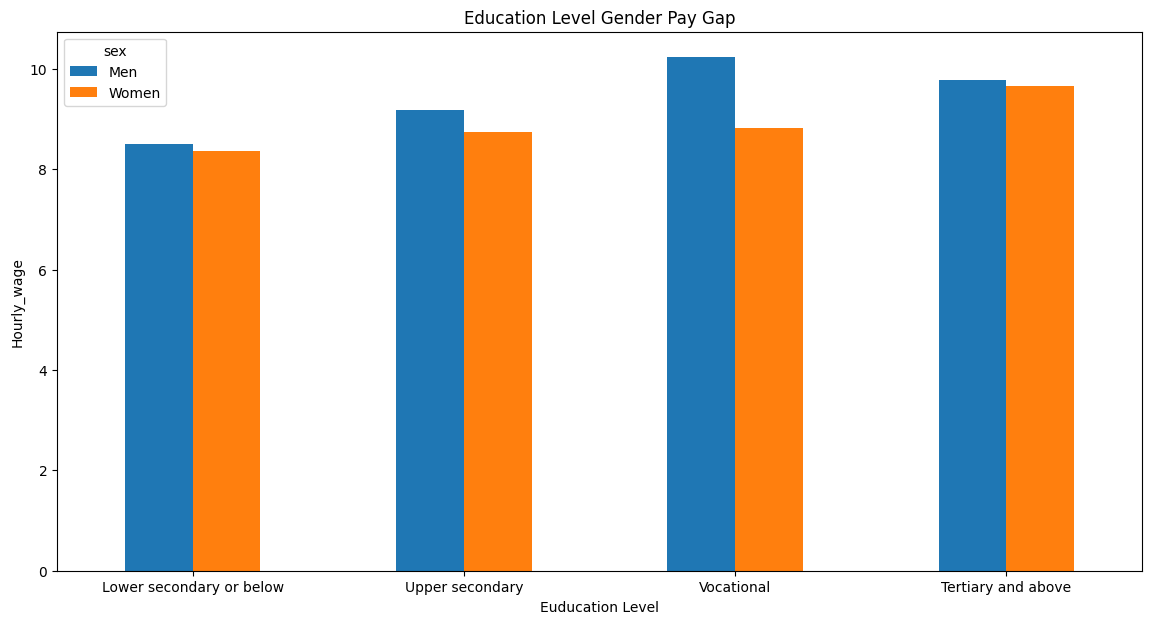

In [139]:
hourly_gender.plot(x="education_levels", y=['Men', 'Women'], kind="bar", figsize=(14, 7), rot=0, title = 'Education Level Gender Pay Gap',  xlabel= "Euducation Level", ylabel="Hourly_wage")

<AxesSubplot:title={'center':'Education Level Gender Pay Gap'}, xlabel='Euducation Level', ylabel='% pay Gap'>

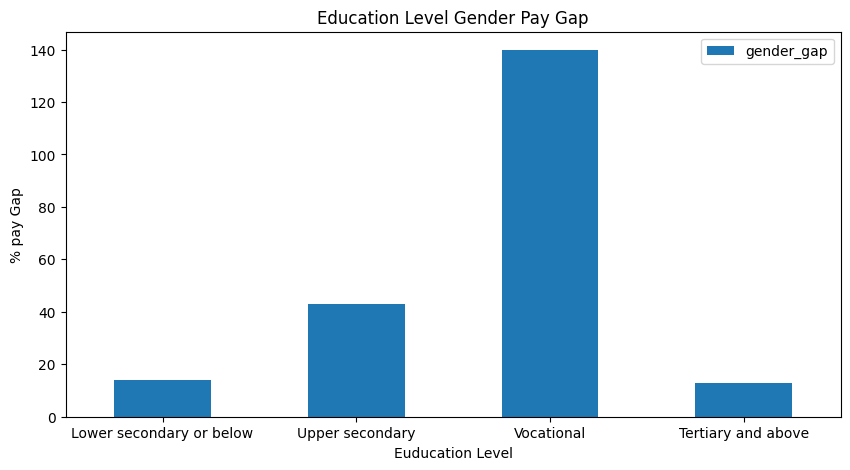

In [140]:
hourly_gender.plot(x="education_levels", y='gender_gap', kind="bar", figsize=(10, 5), rot=0, title = 'Education Level Gender Pay Gap',  xlabel= "Euducation Level", ylabel="% pay Gap")

# Monthly

In [147]:
mwage_gender = gender_educ_wage[gender_educ_wage['monthly_wage'].notna()]
mwage_gender = mwage_gender[mwage_gender['monthly_wage']!=0].copy()

In [148]:
mwage_gender

,unique_person_id,education_levels,sex,hourly_wage,proportion,monthly_wage,lw,lmw
14,2e52712b6bed4118b543e6d8488ee019_1.0,1.0,1.0,6000.000000,0.0195,120000.0,8.699514,11.695247
15,2e52712b6bed4118b543e6d8488ee019_1.0,1.0,1.0,6000.000000,0.0195,120000.0,8.699514,11.695247
86,0a33bbb4716e43918e2dcb131f616aff_1.0,1.0,1.0,2142.857178,0.0173,240000.0,7.669895,12.388394
87,0a33bbb4716e43918e2dcb131f616aff_1.0,1.0,1.0,2142.857178,0.0173,240000.0,7.669895,12.388394
90,0e0d592eae8546e29fa5672ad599d418_6.0,3.0,1.0,15000.000000,0.0173,1680000.0,9.615806,14.334305
...,...,...,...,...,...,...,...,...
5911,fd19da02859e4785bef99f2ff6232d00_1.0,2.0,1.0,6779.661133,0.0012,1600000.0,8.821682,14.285514
5924,f58c0a5e67b6493293f44c02d9bf9e8f_1.0,2.0,1.0,7575.757812,0.0013,2000000.0,8.932709,14.508657
5925,f58c0a5e67b6493293f44c02d9bf9e8f_1.0,2.0,1.0,7575.757812,0.0013,2000000.0,8.932709,14.508657
5934,de413dde36c14865962c2c14ececa013_1.0,NaN,1.0,2777.777832,0.0010,800000.0,7.929407,13.592367


In [149]:
mwg = mwage_gender.groupby(['education_levels', 'sex']).apply(weighted_average,
                                     'lmw', 'proportion')

In [152]:
mwg = pd.DataFrame(mwg)
mwg = mwg.reset_index()
mwg

,education_levels,sex,0
0,1.0,1.0,13.169093
1,1.0,2.0,12.708268
2,2.0,1.0,13.944801
3,2.0,2.0,13.247575
4,3.0,1.0,14.707589
5,3.0,2.0,13.712758
6,4.0,1.0,14.978662
7,4.0,2.0,14.508657


In [153]:
monthly_gender = mwg.pivot(index='education_levels', columns='sex', values=0)

In [156]:
monthly_gender = monthly_gender.reset_index()
monthly_gender = monthly_gender.rename(columns={1.0 : 'Men', 2.0: 'Women'})
monthly_gender['gender_gap'] = (monthly_gender['Men'] - monthly_gender['Women'])*100

In [157]:
monthly_gender

sex,index,education_levels,Men,Women,gender_gap
0,0,1.0,13.169093,12.708268,46.082480
1,1,2.0,13.944801,13.247575,69.722595
2,2,3.0,14.707589,13.712758,99.483038
3,3,4.0,14.978662,14.508657,47.000408


In [162]:
scale_mapper = {1.0:'Lower secondary or below', 2.0:'Upper secondary', 3: 'Vocational', 4: 'Tertiary and above'}
monthly_gender["education_levels"] = monthly_gender["education_levels"].replace(scale_mapper)

<AxesSubplot:title={'center':'Education Level Gender Pay Gap'}, xlabel='Education Level', ylabel='Monthly_wage'>

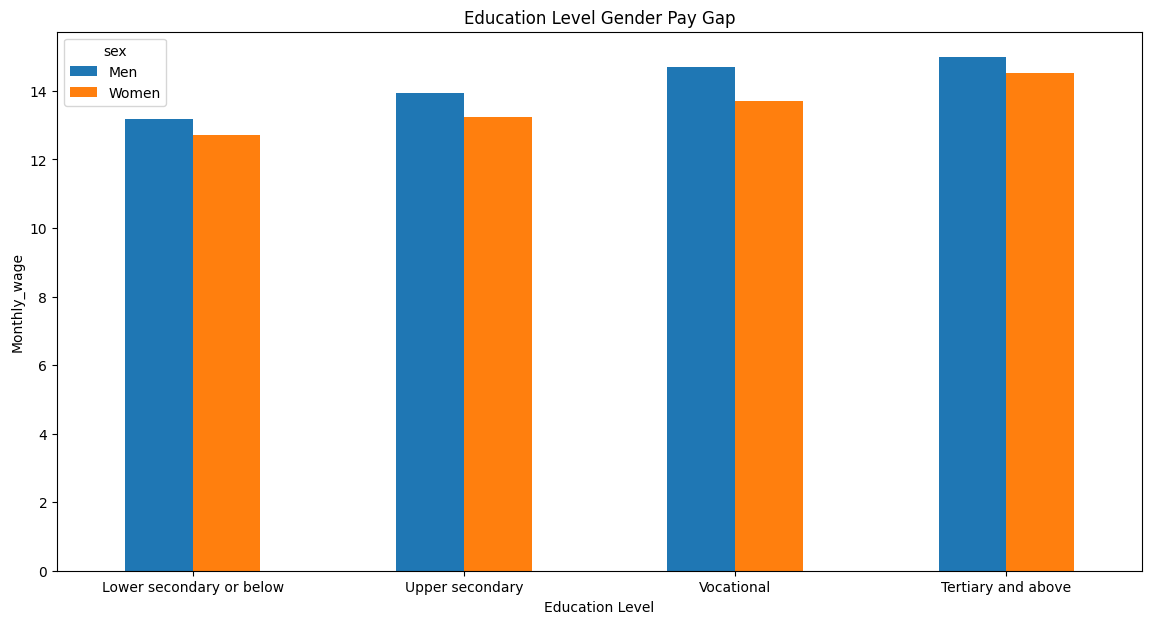

In [163]:
monthly_gender.plot(x="education_levels", y=['Men', 'Women'], kind="bar", figsize=(14, 7), rot=0, title = 'Education Level Gender Pay Gap',  xlabel= "Education Level", ylabel="Monthly_wage")

<AxesSubplot:title={'center':'Education Level Gender Pay Gap'}, xlabel='Euducation Level', ylabel='% pay Gap'>

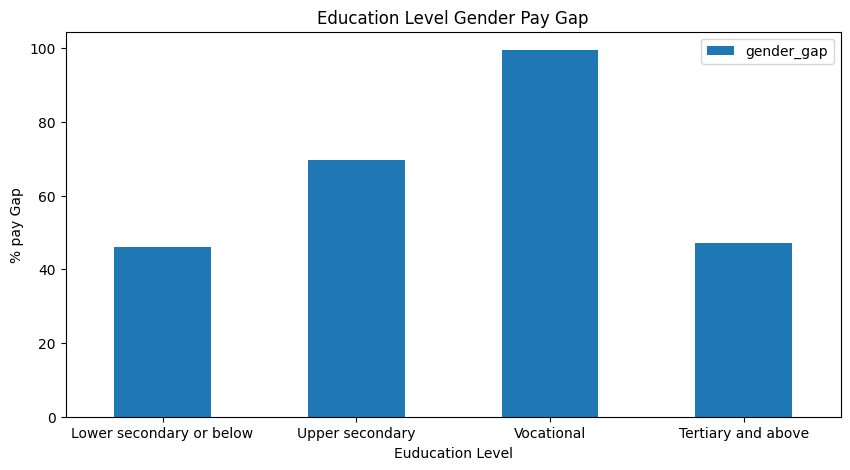

In [164]:
monthly_gender.plot(x="education_levels", y='gender_gap', kind="bar", figsize=(10, 5), rot=0, title = 'Education Level Gender Pay Gap',  xlabel= "Euducation Level", ylabel="% pay Gap")